In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
athlete = pd.read_csv('athletes.csv')

In [3]:
athlete = athlete[athlete['sport'].isin(['basketball','golf','aquatics','weightlifting'])]

In [4]:
athlete.head()

,id,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze
7,382571888,AUS,male,1991-09-25,1.93,100.0,aquatics,0,0,0
12,258556239,IOA,male,1992-10-11,NaN,NaN,aquatics,0,0,0
14,162792594,USA,female,1996-12-03,1.78,68.0,aquatics,1,1,0
26,189931373,SUD,male,1994-10-12,1.81,72.0,aquatics,0,0,0
45,702606719,SEN,male,1988-08-20,1.90,90.0,aquatics,0,0,0


In [5]:
athlete['medal_total'] = athlete[['gold','silver','bronze']].sum(axis=1)

In [6]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2111 entries, 7 to 11536
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2111 non-null   int64  
 1   nationality    2111 non-null   object 
 2   sex            2111 non-null   object 
 3   date_of_birth  2111 non-null   object 
 4   height         2059 non-null   float64
 5   weight         2056 non-null   float64
 6   sport          2111 non-null   object 
 7   gold           2111 non-null   int64  
 8   silver         2111 non-null   int64  
 9   bronze         2111 non-null   int64  
 10  medal_total    2111 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 197.9+ KB


In [7]:
medals_won = athlete.groupby('nationality')[['gold', 'silver','bronze']]\
.sum().sort_values('gold', ascending=False).head(12)

medals_won['total medals'] = medals_won[['gold','silver','bronze']].sum(axis=1)

In [8]:
medals_won.reset_index(inplace=True)

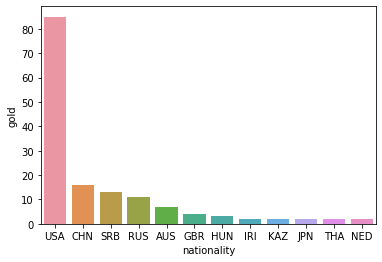

In [9]:
ax = sns.barplot(x='nationality', y='gold', data=medals_won)

In [10]:
medals_won

,nationality,gold,silver,bronze,total medals
0,USA,85,18,12,115
1,CHN,16,17,6,39
2,SRB,13,12,12,37
3,RUS,11,2,15,28
4,AUS,7,14,13,34
5,GBR,4,13,2,19
6,HUN,3,2,2,7
7,IRI,2,0,0,2
8,KAZ,2,1,3,6
9,JPN,2,2,18,22


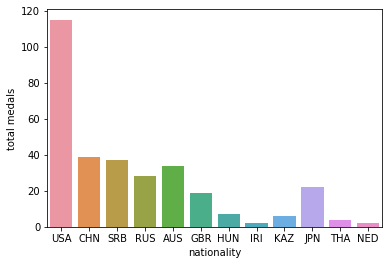

In [11]:
aa = sns.barplot(x='nationality',y='total medals', data=medals_won)

In [12]:
athlete['weight'] = athlete['weight'].dropna().astype(int)

In [13]:
gn = athlete.groupby('nationality', as_index=True)[['height','weight','sex']]

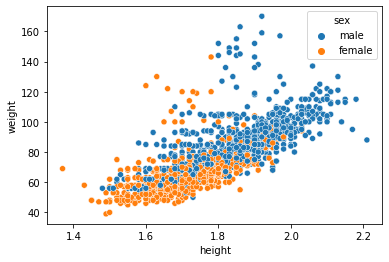

In [14]:
ac = sns.scatterplot(data = athlete, x='height', y='weight', hue='sex')

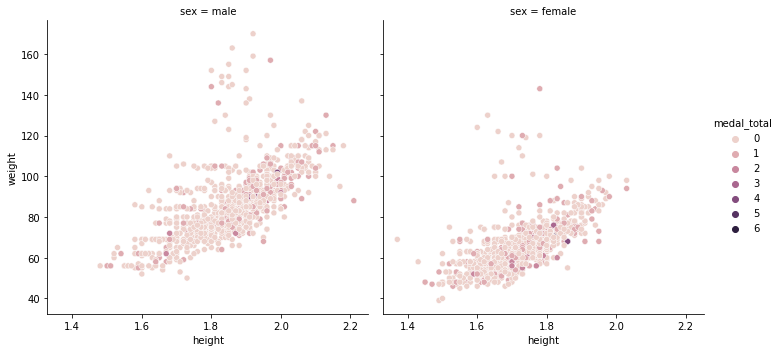

In [15]:
ad = sns.relplot(data=athlete, x='height', y='weight', col='sex', hue='medal_total')

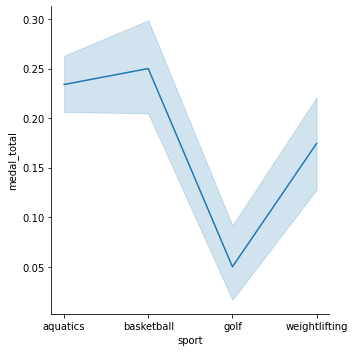

In [16]:
ae = sns.relplot(data=athlete, x='sport', y='medal_total', kind='line')

In [17]:
athlete['sport'].unique()

array(['aquatics', 'basketball', 'golf', 'weightlifting'], dtype=object)

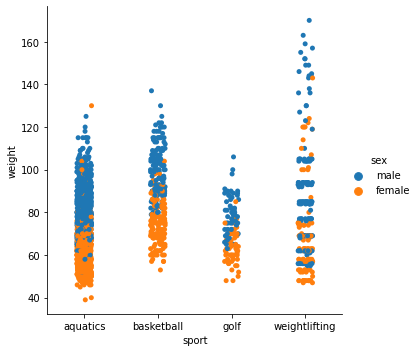

In [18]:
af = sns.catplot(data=athlete, x='sport', y='weight', hue='sex')

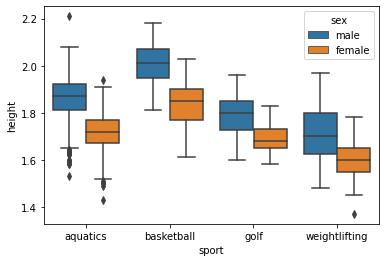

In [19]:
ag = sns.boxplot(data=athlete, x='sport', y='height', hue='sex')